In [8]:
# Import libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [9]:
# Path to files
data_csv = 'data.csv'
labels_csv = 'labels.csv'

# Read files into dataframe
df_data = pd.read_csv(data_csv)
df_labels = pd.read_csv(labels_csv)

# Merge dfs as table and display it
df_merged = pd.merge(df_data, df_labels, left_on='Unnamed: 0', right_on='Unnamed: 0')
df_merged

# Save as CSV
first_and_last_rows = pd.concat([df_merged.head(5), df_merged.tail(5)])
first_and_last_rows.to_csv('merged_table.csv', index=False)
# df_merged.to_csv('merged_table.csv', index=False)

Top 5 Absolute Values: (-0.004107587469862857, 0.004100837904349636, 0.003898685889953499, 0.0037410899215630003, 0.003677499964345174)
Top 5 Indices: (1317, 18745, 9175, 17048, 15897)


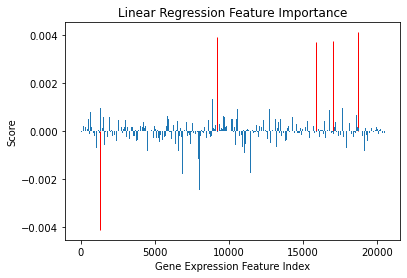

In [10]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# Fix df_data and df_labels
df_d = df_data.drop(df_data.columns[0], axis=1)
df_l = df_labels.drop(df_labels.columns[0], axis=1)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
df_l_encoded = label_encoder.fit_transform(df_l.values.ravel())

# Define the model and fit it, get its importance
model = LinearRegression()
model.fit(df_d, df_l_encoded)
importance = model.coef_

# Get the indices and values of the top 5 elements (by abs value)
top_5_indices_values = sorted(enumerate(importance), key=lambda x: abs(x[1]), reverse=True)[:5]
top_5_indices, top_5_values = zip(*top_5_indices_values)
print("Top 5 Absolute Values:", top_5_values)
print("Top 5 Indices:", top_5_indices)

# Plot feature importance
bar_plot = pyplot.bar(range(len(importance)), importance)
pyplot.xlabel('Gene Expression Feature Index')
pyplot.ylabel('Score')
pyplot.title('Linear Regression Feature Importance')

# Highlight the top 5 bars with red
for idx in top_5_indices:
    bar_plot[idx].set_color('red')

# Get figure
plt.savefig('Feature_Linear.png', bbox_inches='tight')
pyplot.show()

In [11]:
# Perform dimensionality reduction using PCA
X = df_merged.iloc[:, 1:20531].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

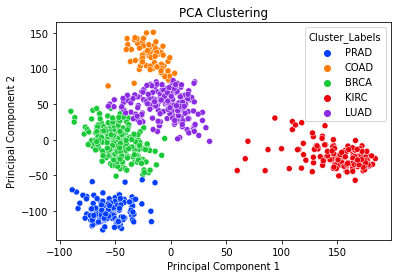

In [12]:
# Perform clustering

# Assign y the cancer classification labels
y = df_merged['Class'].values

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster information to the df
df_merged['Cluster'] = clusters

# Dictionary mapping cluster indices to cancer diagnosis labels
cluster_label_mapping = {0: 'COAD', 1: 'BRCA', 2: 'KIRC', 3: 'PRAD', 4: 'LUAD'}

# Cluster_Labels column made by mapping cluster indices to labels
df_merged['Cluster_Labels'] = df_merged['Cluster'].map(cluster_label_mapping)

# Scatter plot using PCA
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_merged['Cluster_Labels'], palette='bright')
plt.title('PCA Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('Clusters.png', bbox_inches='tight')
plt.show()